# 부동산관련지수 통합
- 2020.08.29 작업본  

(상세 기술 추가 예정) 


In [1]:
# Import data handling Packages
import pandas as pd
import glob
import re

In [2]:
# Set Data directory
data_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/'
save_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/datasets/'


In [3]:
# 세부 경로
lv_dir = '부동산_관련지수/'
file_list = glob.glob(data_dir+lv_dir+ '*/*')
print(len(file_list))
file_list

12


['C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\01.경기종합지수\\경기종합지수_동행지수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\01.경기종합지수\\경기종합지수_선행지수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\02.소비자물가지수\\소비자물가지수_월세.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\02.소비자물가지수\\소비자물가지수_전세.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\02.소비자물가지수\\소비자물가지수_전체.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\02.소비자물가지수\\소비자물가지수_집세.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\03.생산자물가지수\\생산자물가지수_비주거용 건물임대.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\03.생산자물가지수\\생산자물가지수_비주거용 부동산관리.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\03.생산자물가지수\\생산자물가지수_총지수.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\04.부동산시장 소비심리지수\\부동산시장_소비심리지수_부동산시장.xlsx',
 'C:/Users/seoun/Desktop/Python/milestone_data/부동산_관련지수\\04.부동산시장 소비심리지수\\부동산시장_소비심리지수_주택시장.xlsx',
 '

##### 테이블 통합 대상: 
" 동행지수, 선행지수 " : 전국값  
" (나머지) " : 전국+ 서울 값 사용

In [4]:
# import raw data

rei0_df = pd.read_excel(file_list[0], sheet_name=0, header=10, index_col=0).T
rei1_df = pd.read_excel(file_list[1], sheet_name=0, header=10, index_col=0).T
rei2_df = pd.read_excel(file_list[2], sheet_name=0, header=10, index_col=0).T
rei3_df = pd.read_excel(file_list[3], sheet_name=0, header=10, index_col=0).T
rei4_df = pd.read_excel(file_list[4], sheet_name=0, header=10, index_col=0).T
rei5_df = pd.read_excel(file_list[5], sheet_name=0, header=10, index_col=0).T
rei6_df = pd.read_excel(file_list[6], sheet_name=0, header=10, index_col=0).T
rei7_df = pd.read_excel(file_list[7], sheet_name=0, header=10, index_col=0).T
rei8_df = pd.read_excel(file_list[8], sheet_name=0, header=10, index_col=0).T
rei9_df = pd.read_excel(file_list[9], sheet_name=0, header=10, index_col=0).T
rei10_df = pd.read_excel(file_list[10], sheet_name=0, header=10, index_col=0).T
rei11_df = pd.read_excel(file_list[11], sheet_name=0, header=10, index_col=0).T

In [5]:
# 지수주기 별 
# 기준년월 단위 
print(rei0_df.head()) # 경기종합지수(CEI)_동행지수
print(rei1_df.head()) # 경기종합지수(CEI)_선행지수

# 기준년월 단위 + 광역 시도
print(rei2_df.head()) # CPI_월세
print(rei3_df.head()) # CPI_전세
print(rei4_df.head()) # CPI_전체
print(rei5_df.head()) # CPI_집세

# 기준년월 단위
print(rei6_df.head()) # PPI_건물임대
print(rei7_df.head()) # PPI_부동산관리
print(rei8_df.head()) # PPI_전체

# 기준년월 단위 + 광역 시도
print(rei9_df.head()) # 부동산시장_소비심리지수(CSI)_부동산
print(rei10_df.head()) # 부동산시장_소비심리지수(CSI)_주택
print(rei11_df.head()) # 부동산시장_소비심리지수(CSI)_토지


지 역         전국
1970년 01월  4.0
1970년 02월  4.1
1970년 03월  4.1
1970년 04월  4.2
1970년 05월  4.3
지 역         전국
1970년 01월  4.2
1970년 02월  4.2
1970년 03월  4.3
1970년 04월  4.3
1970년 05월  4.3
지 역           전국     서울     부산     대구     인천     광주     대전     울산     경기  \
1990년 01월  55.19  51.22  56.19  52.22  57.88  56.98  56.38  67.73  55.20   
1990년 02월  55.35  51.46  56.35  52.74  57.88  58.06  56.63  67.73  55.36   
1990년 03월  55.76  51.77  56.35  53.00  58.14  58.06  56.63  68.07  55.52   
1990년 04월  56.34  52.48  56.92  53.35  58.31  58.31  57.38  68.48  55.76   
1990년 05월  57.40  54.04  57.74  54.21  59.34  58.48  57.80  68.73  56.23   

지 역           강원     충북     충남     전북     전남     경북     경남     제주  
1990년 01월  49.94  58.99  62.48  55.80  53.62  58.81  71.01  41.34  
1990년 02월  50.40  58.99  63.34  56.05  54.15  58.89  71.10  41.56  
1990년 03월  50.47  62.58  63.53  56.88  54.54  59.22  71.55  47.01  
1990년 04월  51.17  62.66  64.58  57.46  54.77  59.47  71.99  47.01  
1990년 05월  51.78  63.58

In [6]:
# 지수주기 별 
# 기준년월 단위
rei0_df.rename(columns={'전국': 'CEI_동행지수'}, inplace=True) # 경기종합지수_동행지수
rei1_df.rename(columns={'전국': 'CEI_선행지수'}, inplace=True) # 경기종합지수_선행지수
rei6_df.rename(columns={'전국': 'PPI_건물임대'}, inplace=True) # PPI_건물임대
rei7_df.rename(columns={'전국': 'PPI_부동산관리'}, inplace=True) # PPI_부동산관리
rei8_df.rename(columns={'전국': 'PPI_전체'}, inplace=True) # PPI_전체



In [7]:
# 지수주기 별 
# 기준년월 단위
frames = [rei0_df, rei1_df, rei6_df, rei7_df, rei8_df]
rei_months_df = pd.concat(frames, axis=1) 



C:\Users\seoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


### * 4.1 부동산관련지수_월주기지표

In [8]:
rei_months_df.columns.rename(None, inplace=True)
rei_months_df.index.rename('기준년월', inplace=True)
rei_months_df.reset_index(inplace=True)

rei_months_df.tail(10)

,기준년월,CEI_동행지수,CEI_선행지수,PPI_건물임대,PPI_부동산관리,PPI_전체
596,2019년 09월,112.3,116.1,103.24,106.29,103.80
597,2019년 10월,112.6,116.8,103.28,106.35,103.56
598,2019년 11월,112.7,117.5,103.27,106.43,103.41
599,2019년 12월,113.3,118.3,103.30,106.59,103.70
600,2020년 01월,113.8,118.8,103.84,106.91,104.08
601,2020년 02월,113.3,119.0,103.86,106.94,103.74
602,2020년 03월,112.2,118.6,103.86,106.95,102.82
603,2020년 04월,110.9,118.4,103.84,107.00,101.93
604,2020년 05월,110.1,118.5,103.83,107.00,101.96
605,2020년 06월,110.6,119.2,103.75,107.10,102.52


### * 4.2 부동산관련지수_월주기+광역시도구분지표
: ['전국', '서울'] 속성 선택적 추출

In [9]:
# 전국추세, 서울 집계에 대해서만 추출 
common_cols = ['전국','서울'] # : CPI, CSI df 에서 추출 

rei2_part_df = rei2_df[common_cols] # CPI_월세
rei3_part_df = rei3_df[common_cols] # CPI_전세
rei4_part_df = rei4_df[common_cols] # CPI_전체
rei5_part_df = rei5_df[common_cols] # CPI_집세
rei9_part_df = rei9_df[common_cols] # 부동산시장_소비심리지수(CSI)_부동산
rei10_part_df = rei10_df[common_cols] # 부동산시장_소비심리지수(CSI)_주택
rei11_part_df = rei11_df[common_cols] # 부동산시장_소비심리지수(CSI)_토지


In [10]:
# 컬럼 index name 누락
rei2_part_df.columns.rename(None,inplace=True)
rei3_part_df.columns.rename(None,inplace=True)
rei4_part_df.columns.rename(None,inplace=True)
rei5_part_df.columns.rename(None,inplace=True)
rei9_part_df.columns.rename(None,inplace=True)
rei10_part_df.columns.rename(None,inplace=True)
rei11_part_df.columns.rename(None,inplace=True)

# index Name 지정
rei2_part_df.index.rename('기준년월', inplace=True)
rei3_part_df.index.rename('기준년월', inplace=True)
rei4_part_df.index.rename('기준년월', inplace=True)
rei5_part_df.index.rename('기준년월', inplace=True)
rei9_part_df.index.rename('기준년월', inplace=True)
rei10_part_df.index.rename('기준년월', inplace=True)
rei11_part_df.index.rename('기준년월', inplace=True)

# df별 공통속성명 중복방지(prefix 추가)
rei2_part_df = rei2_part_df.add_prefix('CPI_월세_')
rei3_part_df = rei3_part_df.add_prefix('CPI_전세_')
rei4_part_df = rei4_part_df.add_prefix('CPI_전체_')
rei5_part_df = rei5_part_df.add_prefix('CPI_집세_')
rei9_part_df = rei9_part_df.add_prefix('CSI_부동산_')
rei10_part_df = rei10_part_df.add_prefix('CSI_주택_')
rei11_part_df = rei11_part_df.add_prefix('CSI_토지_')


In [11]:
# 지수주기 별 통합
# 기준년월도 단위
frames = [rei2_part_df, rei3_part_df, rei4_part_df, rei5_part_df, rei9_part_df, rei10_part_df, rei11_part_df]
rei_months_provs_df = pd.concat(frames, axis=1).reset_index()



C:\Users\seoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [12]:
rei_months_provs_df.rename(columns={'index':'기준년월'}, inplace=True)
rei_months_provs_df.tail(10)

,기준년월,CPI_월세_전국,CPI_월세_서울,CPI_전세_전국,CPI_전세_서울,CPI_전체_전국,CPI_전체_서울,CPI_집세_전국,CPI_집세_서울,CSI_부동산_전국,CSI_부동산_서울,CSI_주택_전국,CSI_주택_서울,CSI_토지_전국,CSI_토지_서울
357,2019년 10월,99.74,100.04,107.78,110.56,105.46,105.80,103.96,106.14,112.7,130.6,114.5,133.6,96.7,104
358,2019년 11월,99.74,100.10,107.79,110.62,104.87,105.24,103.97,106.20,114.4,129.7,116.4,132.4,96.9,104.9
359,2019년 12월,99.77,100.11,107.80,110.68,105.12,105.44,103.99,106.24,114.3,125.6,116.7,128.4,93.3,100.4
360,2020년 01월,99.80,100.17,107.83,110.77,105.79,106.09,104.03,106.32,113,116.5,115.3,118.5,93,98.9
361,2020년 02월,99.82,100.22,107.88,110.87,105.80,106.06,104.06,106.40,115.9,120.1,118.3,122.7,94.8,96
362,2020년 03월,99.84,100.28,107.91,111.00,105.54,105.97,104.08,106.50,107,109.8,108.6,111.1,92.3,98.1
363,2020년 04월,99.84,100.32,107.97,111.12,104.95,105.55,104.11,106.58,103.1,102.2,104.6,103.8,89.1,88.1
364,2020년 05월,99.84,100.46,108.03,111.28,104.71,105.32,104.14,106.74,109.8,112.5,111.6,114.2,93.7,97.7
365,2020년 06월,99.86,100.52,108.09,111.35,104.87,105.51,104.17,106.80,120.2,131.9,122.8,135.2,96.7,103.1
366,2020년 07월,99.88,100.60,108.18,111.43,104.86,105.42,104.23,106.88,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# export Dataframe
rei_months_df.to_csv(save_dir+'04.부동산관련지수_월주기지표.csv', encoding='euc-kr', index=False)
rei_months_provs_df.to_csv(save_dir+'04.부동산관련지수_월주기+전국서울지표.csv', encoding='euc-kr', index=False)

## * Visualization

In [14]:
import seaborn as sns

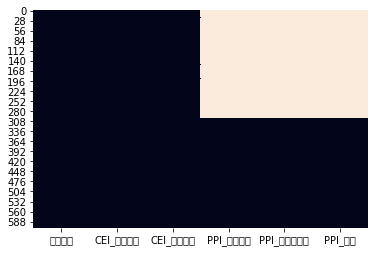

In [15]:
sns.heatmap(rei_months_df.isna(), cbar=False)

In [16]:
rei_months_df.head()

,기준년월,CEI_동행지수,CEI_선행지수,PPI_건물임대,PPI_부동산관리,PPI_전체
0,1970년 01월,4.0,4.2,NaN,NaN,NaN
1,1970년 02월,4.1,4.2,NaN,NaN,NaN
2,1970년 03월,4.1,4.3,NaN,NaN,NaN
3,1970년 04월,4.2,4.3,NaN,NaN,NaN
4,1970년 05월,4.3,4.3,NaN,NaN,NaN


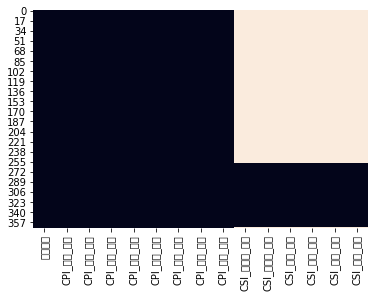

In [17]:
sns.heatmap(rei_months_provs_df.isna(), cbar=False)

In [18]:
rei_months_provs_df.head()

,기준년월,CPI_월세_전국,CPI_월세_서울,CPI_전세_전국,CPI_전세_서울,CPI_전체_전국,CPI_전체_서울,CPI_집세_전국,CPI_집세_서울,CSI_부동산_전국,CSI_부동산_서울,CSI_주택_전국,CSI_주택_서울,CSI_토지_전국,CSI_토지_서울
0,1990년 01월,55.19,51.22,42.06,38.30,38.99,38.76,45.55,40.77,NaN,NaN,NaN,NaN,NaN,NaN
1,1990년 02월,55.35,51.46,42.24,38.47,39.23,38.97,45.75,40.95,NaN,NaN,NaN,NaN,NaN,NaN
2,1990년 03월,55.76,51.77,42.79,39.21,39.64,39.41,46.28,41.56,NaN,NaN,NaN,NaN,NaN,NaN
3,1990년 04월,56.34,52.48,43.41,39.83,40.08,39.90,46.81,42.23,NaN,NaN,NaN,NaN,NaN,NaN
4,1990년 05월,57.40,54.04,44.51,40.98,40.53,40.34,47.95,43.52,NaN,NaN,NaN,NaN,NaN,NaN
